In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

results_path = "/Users/matteo/Projects/MFI/results_plot"
path = "/Users/matteo/Projects/MFI"
os.chdir(path)

from pyMFI import MFI
from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

In [4]:
path_data = "/Users/matteo/Projects/MFI_paper_figures/Figure2"
os.chdir(path_data)

#Run simulation
run_plumed.run_2D_Invernizzi(simulation_steps=10000000, sigma=0.1, height=0.5, biasfactor=10, initial_position_x=1, initial_position_y=-1, file_extension="long")

Running simulation...
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0-dev (git: ) compiled on May 23 2022 at 11:08:09
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: pesmd
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action DISTANCE
PLUMED:   with label p
PLUMED:   between atoms 1 2
PLUMED:   using periodic boundary conditions
PLUMED:   added component to this action:  p.x 
PLUMED:   added component to this action:  p.y 
PLUMED:   added component to this action:  p.z 
PLUMED:   WARNING: components will not have the proper periodicity - see manual
PLUMED: Action MATHEVAL
PLUMED:   with label ff
PLU

libc++abi: terminating with uncaught exception of type PLMD::Plumed::ExceptionError: 
+++ PLUMED error
+++ at Grid.cpp:169, function GridBase::index_t PLMD::GridBase::getIndex(const std::vector<unsigned int> &) const
+++ message follows +++
ERROR: the system is looking for a value outside the grid along the 0 (p.x) index!
[Matteos-MBP-2:57688] *** Process received signal ***
[Matteos-MBP-2:57688] Signal: Abort trap: 6 (6)
[Matteos-MBP-2:57688] Signal code:  (0)
[Matteos-MBP-2:57688] [ 0] 0   libsystem_platform.dylib            0x00007ff8177fcdfd _sigtramp + 29
[Matteos-MBP-2:57688] [ 1] 0   ???                                 0x00000000000000ee 0x0 + 238
[Matteos-MBP-2:57688] [ 2] 0   libsystem_c.dylib                   0x00007ff817732d24 abort + 123
[Matteos-MBP-2:57688] [ 3] 0   libc++abi.dylib                     0x00007ff8177a3082 abort_message + 241
[Matteos-MBP-2:57688] [ 4] 0   libc++abi.dylib                     0x00007ff8177941a5 _ZL28demangling_terminate_handlerv + 242
[Matte

ing step 5726840
Doing step 5726860
Doing step 5726880
Doing step 5726900
Doing step 5726920
Doing step 5726940
Doing step 5726960
Doing step 5726980
Doing step 5727000
Doing step 5727020
Doing step 5727040
Doing step 5727060
Doing step 5727080
Doing step 5727100
Doing step 5727120
Doing step 5727140
Doing step 5727160
Doing step 5727180
Doing step 5727200
Doing step 5727220
Doing step 5727240
Doing step 5727260
Doing step 5727280
Doing step 5727300
Doing step 5727320
Doing step 5727340
Doing step 5727360
Doing step 5727380
Doing step 5727400
Doing step 5727420
Doing step 5727440
Doing step 5727460
Doing step 5727480
Doing step 5727500
Doing step 5727520
Doing step 5727540
Doing step 5727560
Doing step 5727580
Doing step 5727600
Doing step 5727620
Doing step 5727640
Doing step 5727660
Doing step 5727680
Doing step 5727700
Doing step 5727720
Doing step 5727740
Doing step 5727760
Doing step 5727780
Doing step 5727800
Doing step 5727820
Doing step 5727840
Doing step 5727860
Doing step 572

In [6]:
#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_long")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="positioninve_long")

#COMPUTE Mean force and weight of the simulation
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.08, kT = 1, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), log_pace = 1000, error_pace = 1000, FES_cutoff = 200)

#integration on a non-periodic domain
[X, Y, FES] = MFI.intgrad2(Ftot_x, Ftot_y, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))

KeyboardInterrupt: 

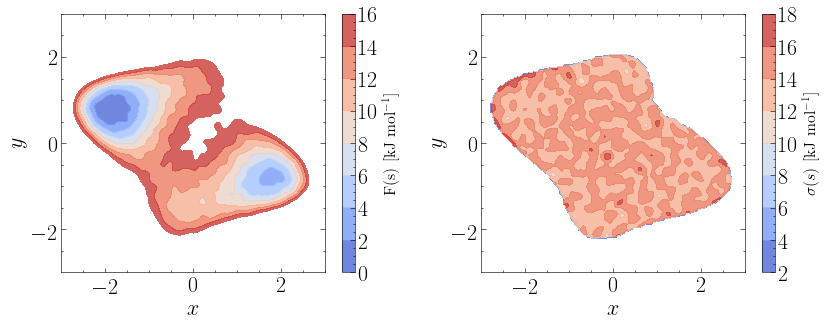

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 18, 2), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(2, 20, 2), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$]",fontsize=16)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure2_A', dpi=600, bbox_inches='tight')

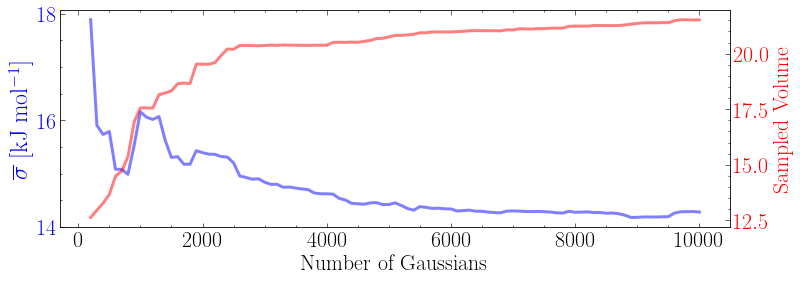

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
axs.plot( [time for time in time_history[1:]], (ofe_history[1:]),color='blue',alpha=0.5,linewidth=3);
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='blue')
axs.tick_params(axis ='y', labelcolor = 'blue')
axs.set_xlabel('Number of Gaussians')

V=np.multiply(volume_history[1:],np.power(2*np.pi/200,2))
ax2 = axs.twinx()
ax2.set_xlabel('Simulation steps')
ax2.set_ylabel('Sampled Volume',color='red')
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:],np.power(6/200,2)),color='red',alpha=0.5,linewidth=3);

plt.savefig('Figure2B', dpi=600, bbox_inches='tight')